In [1]:
# importing all the necessary files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# importing the dataset (dataset is downloaded from kaggle)
df = pd.read_csv('amazon_prime_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
# checking the data types of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


We observe column date_added has data type object , it should have datetime data type,therefore we will correcting this error

In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [6]:
# checking for null values in the dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

Here we notice we have null values in <b>director,cast,country and rating columns</b>

We will be replacing the null values with 'Unavailable' in the director,cast and rating columns as the missing values are less

 The <b>country<b> column has <b> more than 75% </b> values missing , we can drop it or replace it with unavailable for now

In [9]:
df.fillna({'director' : 'Unavailable','cast': 'Unavailable','country' : 'Unavailable','rating' : 'Unavailable'},inplace = True)

<b> date_added </b> has more than <b>90%</b> of the entries as null values we can drop it or we can replace it by the latest date assuming the fact that the content have been added recently

<b>Note:</b> This will not give such a proper and appropriate result

In [10]:
most_recent_date = df['date_added'].max()
df.fillna({'date_added':most_recent_date},inplace = True)


In [11]:
# now again checking the null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h1> Visualizations </h1>

Now we have cleaned the data now with the help of countplot we will find patterns and insights in the data

In [12]:
# Type of shows 
df.type.value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

Text(0.5, 1.0, 'Count Vs Type')

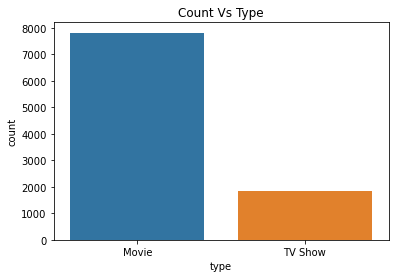

In [13]:
# we will plot types for better understanding
sns.countplot(x='type',data = df)
plt.title('Count Vs Type')

From the above graph we can conclude number of movies are more than tv shows in amazon prime

Text(0.5, 1.0, 'rating wise content on the platform')

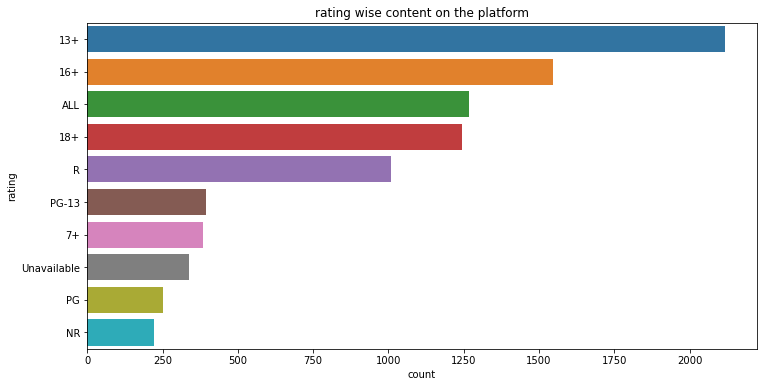

In [18]:
# finding content on basis of rating on the platform
plt.figure(figsize = (12,6))
sns.countplot(y = 'rating',order = df.rating.value_counts().index[0:10],data = df)
plt.title('rating wise content on the platform')

From the above graph we can observe most of the content on amazon platform has rating of 13+

Text(0.5, 1.0, 'Top 10 directors on the platform')

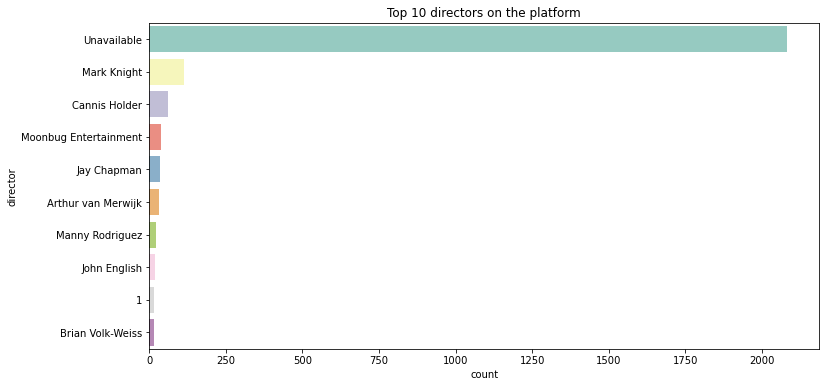

In [22]:
# top 10 directors at the platform
plt.figure(figsize = (12,6))
sns.countplot(y = 'director',order = df.director.value_counts().index[0:10],data = df,palette = "Set3")
plt.title('Top 10 directors on the platform')

As discussed earlier our data had a lot of null values in director column which is evident in the above graph , but on studying  the above graph we can conclude that most of the director names are not updated and work of mark knight is the most on the platform

Text(0.5, 1.0, 'Most contnent was released in which year')

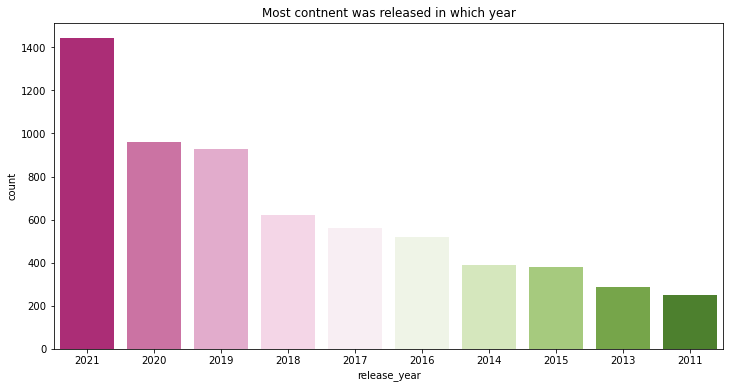

In [28]:
# release year of the content on amazon prime
plt.figure(figsize = (12,6))
sns.countplot(x = 'release_year',order = df.release_year.value_counts().index[0:10],data = df,palette = "PiYG")
plt.title('Most contnent was released in which year')

Most of the content was released in 2021 then followed by year 2020

Text(0.5, 1.0, 'Top 10 countries on the platform')

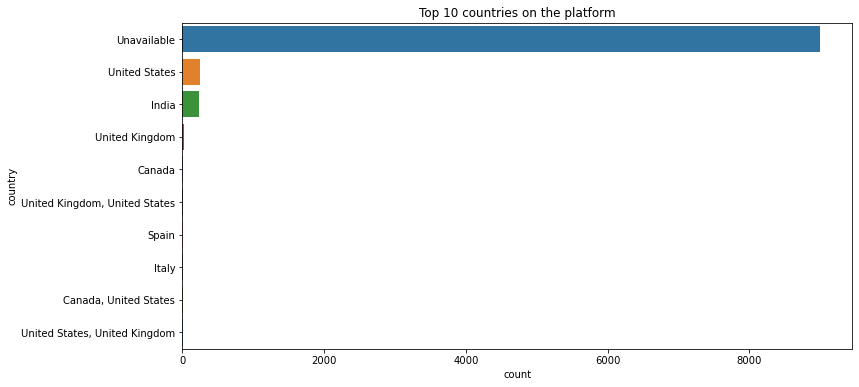

In [31]:
# top 10 countries content at the platform
plt.figure(figsize = (12,6))
sns.countplot(y = 'country',order = df.country.value_counts().index[0:10],data = df)
plt.title('Top 10 countries on the platform')

As discussed earlier our data had a lot of null values in country column which is evident in the above graph , but on studying  the above graph we can conclude that most of the country names are not updated , but united states and india have majorly contributed the content to the platform

<h1> Summary </h1>

<ul>
    <li> Amazon Prime Video has more movies than TV shows</li>
    <li> United states and India  has produced the most number of movies and Tv shows on the platform </li>
    <li> Most of the content on Amazon prime video is for audience of age 13+ </li>
    <li>In 2021 most of the content was released on netflix</li>
    <li> Altough most of the director names haven't been added to the platform ,we can conclude Mark Knights has most of the movie and TV shows on the platform </li>